In [1]:
import math
import numpy as np
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
import scipy.optimize as optimize
import scipy.stats as stats
import pandas as pd
import xlrd
import csv

In [2]:
#YEET
mu_wall = []
mu_b = []
v = []
E_nev = []
P_wall = []
P_3 = []
P_b = []
P_holeg = []
P_holev = []
P_n = []
Sum_Load = []
Sum_Store = []

with open('UCNstoragecalcsreformatted.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            mu_wall.append(float(row[0]))
            mu_b.append(float(row[1]))
            v.append(float(row[2]))
            E_nev.append(float(row[3]))
            P_wall.append(float(row[4]))
            P_3.append(float(row[5]))
            P_b.append(float(row[6]))
            P_holeg.append(float(row[7]))
            P_holev.append(float(row[8]))
            P_n.append(float(row[9]))
            Sum_Load.append(float(row[10]))
            Sum_Store.append(float(row[11]))
            
        else:
            counter+=1




In [3]:
mu_wall = []
mu_b = []
v = []
E_nev = []
P_wall = []
P_3 = []
P_b = []
P_holeg = []
P_holev = []
P_n = []
Sum_Load = []
Sum_Store = []

with open('UCNstoragecalcsreformatted.csv', 'r') as ifile:
    data = csv.reader(ifile)
    
    counter = 0
    for row in data:
        if counter == 1:
            
            mu_wall.append(float(row[0]))
            mu_b.append(float(row[1]))
            v.append(float(row[2]))
            E_nev.append(float(row[3]))
            P_wall.append(float(row[4]))
            P_3.append(float(row[5]))
            P_b.append(float(row[6]))
            P_holeg.append(float(row[7]))
            P_holev.append(float(row[8]))
            P_n.append(float(row[9]))
            Sum_Load.append(float(row[10]))
            Sum_Store.append(float(row[11]))
            
        else:
            counter+=1




In [4]:
mu_wall = np.asarray(mu_wall)
mu_b = np.asarray(mu_b)
v = np.asarray(v)
E_nev = np.asarray(E_nev)
P_wall = np.asarray(P_wall)
P_3 = np.asarray(P_3)
P_b = np.asarray(P_b)
P_holeg = np.asarray(P_holeg)
P_holev = np.asarray(P_holev)
P_n = np.asarray(P_n)
Sum_Load = np.asarray(Sum_Load)
Sum_Store = np.asarray(Sum_Store)

a_hole_g = 12
vol_fill = 40000

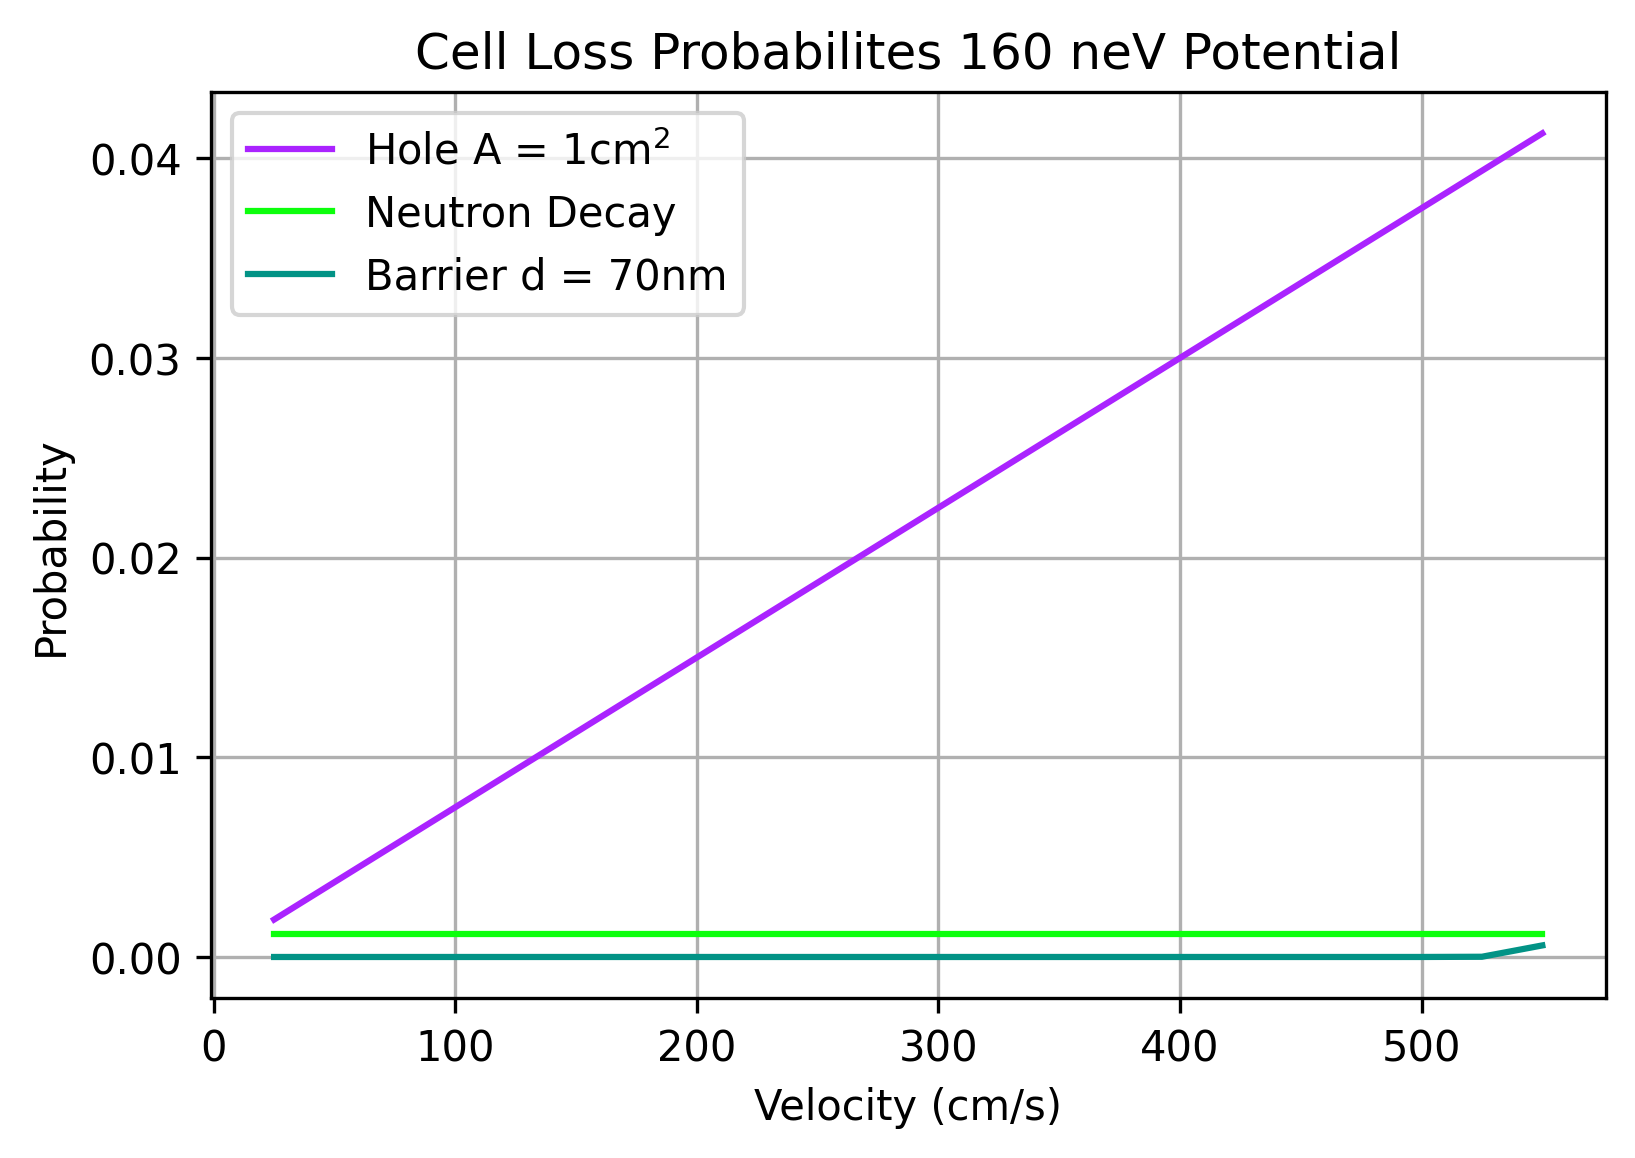

In [5]:
plot.figure(dpi = 300)
plot.plot(v, P_holeg, c = "xkcd:electric purple", label = "Hole A = 1cm$^2$")
plot.plot(v, P_n, c = "xkcd:neon green", label = "Neutron Decay")
plot.plot(v, P_b, c = "xkcd:teal", label = "Barrier d = 70nm")
plot.legend()
plot.xlabel('Velocity (cm/s)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

In [6]:
import numpy as np


v_arr = v
P_holeg_arr = P_holeg

#linear interpolation
def interpolate(v, v_arr, p_holeg_arr):
    return np.interp(v, v_arr, p_holeg_arr)



#Checks whether inputted value is a number before breaking
#Ensures code doesn't malfunction if input contains letters or special characters
while True:
    Value = input()
    try:
        value_float = float(Value)
        result_y = interpolate(value_float, v_arr, P_holeg_arr)
        print(f"At v = {value_float} cm/s, P = {result_y:.5f}")
        break
    except ValueError:
            print("Enter a valid number.")
            



At v = 500.0 cm/s, P = 0.03750


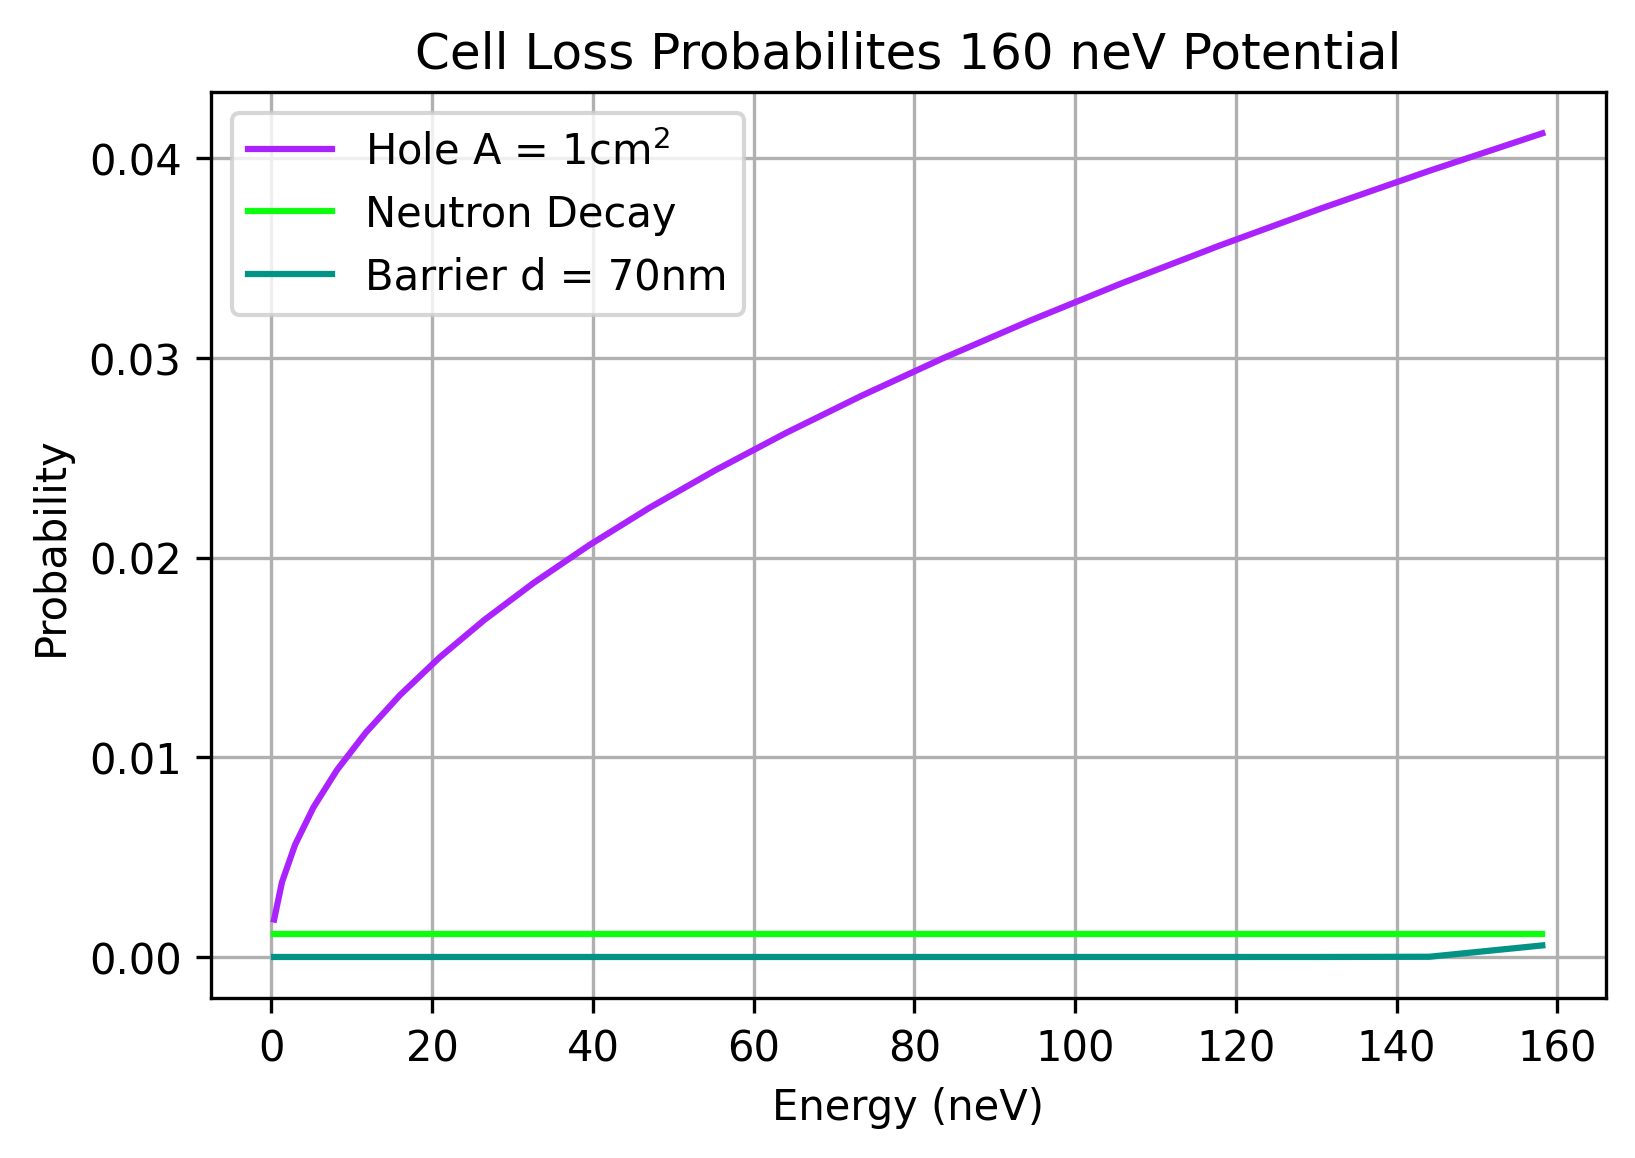

In [7]:
plot.figure(dpi = 300)
plot.plot(E_nev, P_holeg, c = "xkcd:electric purple", label = "Hole A = 1cm$^2$")
plot.plot(E_nev, P_n, c = "xkcd:neon green", label = "Neutron Decay")
plot.plot(E_nev, P_b, c = "xkcd:teal", label = "Barrier d = 70nm")
plot.legend()
plot.xlabel('Energy (neV)')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

In [8]:
#Slightly mundane, done for personal preference
E_arr = E_nev 

logE = np.log(E_nev)

def interpolate_log(E_nev, E_arr, P_holeg_arr):
    logE = np.interp(np.log(E_nev), E_arr, P_holeg_arr)
    return logE

specific_x2 = 332  # Replace this with the x-value you want to find the y-value for
result_y2 = np.exp(interpolate_log(specific_x2, E_arr, P_holeg_arr))  # Exponentiate the interpolated log value
print(f"At E = {specific_x2} neV, y = {result_y2}")

At E = 332 neV, y = 1.0078996381273657


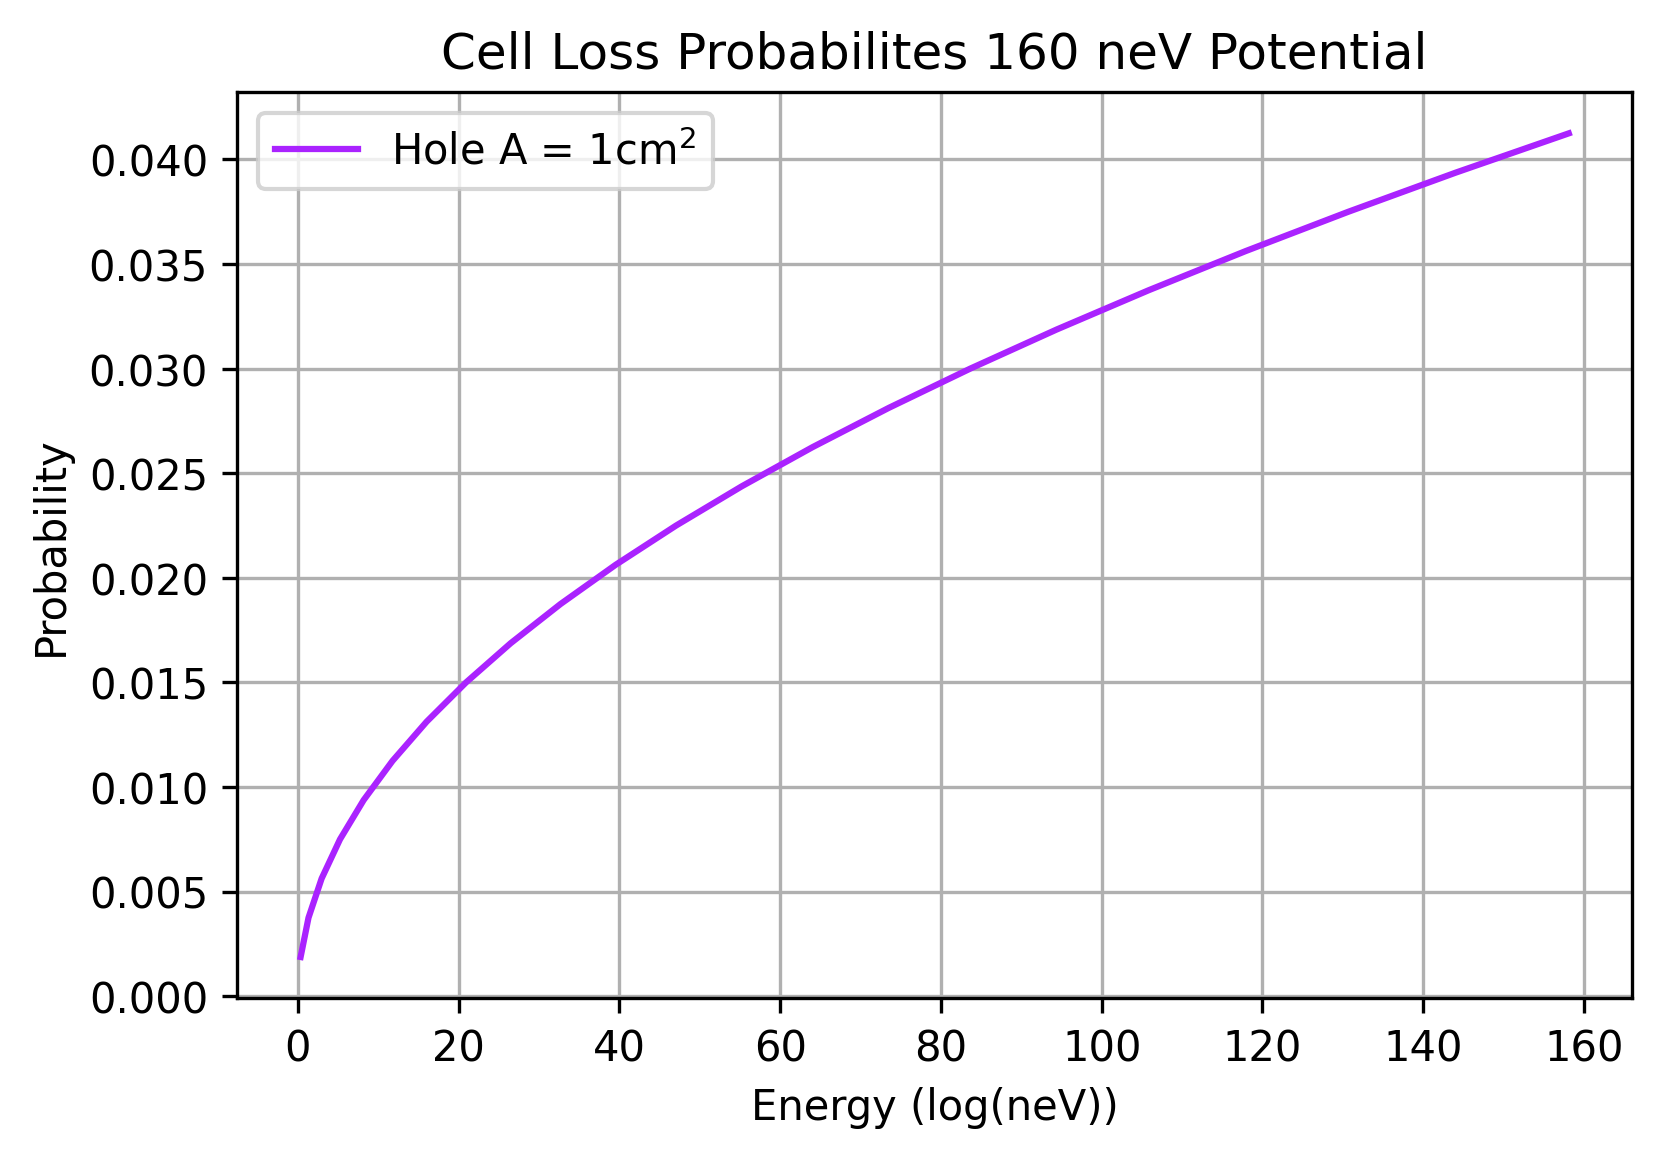

In [9]:
plot.figure(dpi = 300)
plot.plot(E_nev, P_holeg, c = "xkcd:electric purple", label = "Hole A = 1cm$^2$")
plot.legend()
plot.xlabel('Energy (log(neV))')
plot.ylabel('Probability')
plot.title('Cell Loss Probabilites 160 neV Potential')
plot.grid()
plot.show()

In [10]:
##Values taken directly from UCN data
v_M = 554.1
tau_n = 878.0
N_0v = 100000
Lambda = 15.0
f = 8.00 * 10**-5
t_step = 20.0
v_step = 25.0
f = 0.00001
V_nev = 160
three_He = 1000000000
vol_fill = 40000
a_hole_guide = 12
vol_store = 20000
a_hole_valve = 0

In [11]:
## Putting the calculations directly into python rather than pulling
## from excel

v = np.linspace(25, 550, num=22) 
E_nev = 9.39565 / 2/(2.9979)**2 * 0.001 * (v**2)
P_3 = 1 / three_He
#mu_wall = 2*0.00001 * (160 / E_nev * np.arcsin(math.sqrt(E_nev/160))-math.sqrt(160/E_nev-1))
#p_wall = E_nev / 15.0 * mu_wall
p_holeg = v * 12 / 4 / 40000
p_n = 1 / 878.0
#sum_load = p_wall[0] + p_3 + p_b[0] + p_holeg[0] + p_n[0]
#sum_store = p_wall[0] + p_3 + p_b[0] + p_holev[0] + p_n[0]


#prints all values, put [] for a specific value
#print(E_nev)
#print(type(E_nev))
#print(mu_wall)

#[CC-IN2P3 Single Sign On]

In [12]:
##Define some functions to help fix array issue, makes more efficient
def E_nev(v):
    return 9.39565 / 2/(2.9979)**2 * 0.001 * (v**2)

def mu_wall(E_nev):
    return 2*0.00001 * (160 / E_nev * np.arcsin(math.sqrt(E_nev/160))-math.sqrt(160/E_nev-1))

In [13]:
E_nev(25)

0.32669506022595907

In [14]:
mu_wall(E_nev(25))

6.028597198982766e-07

Try $A = exp({-\frac{x}{t} }) + (b)$

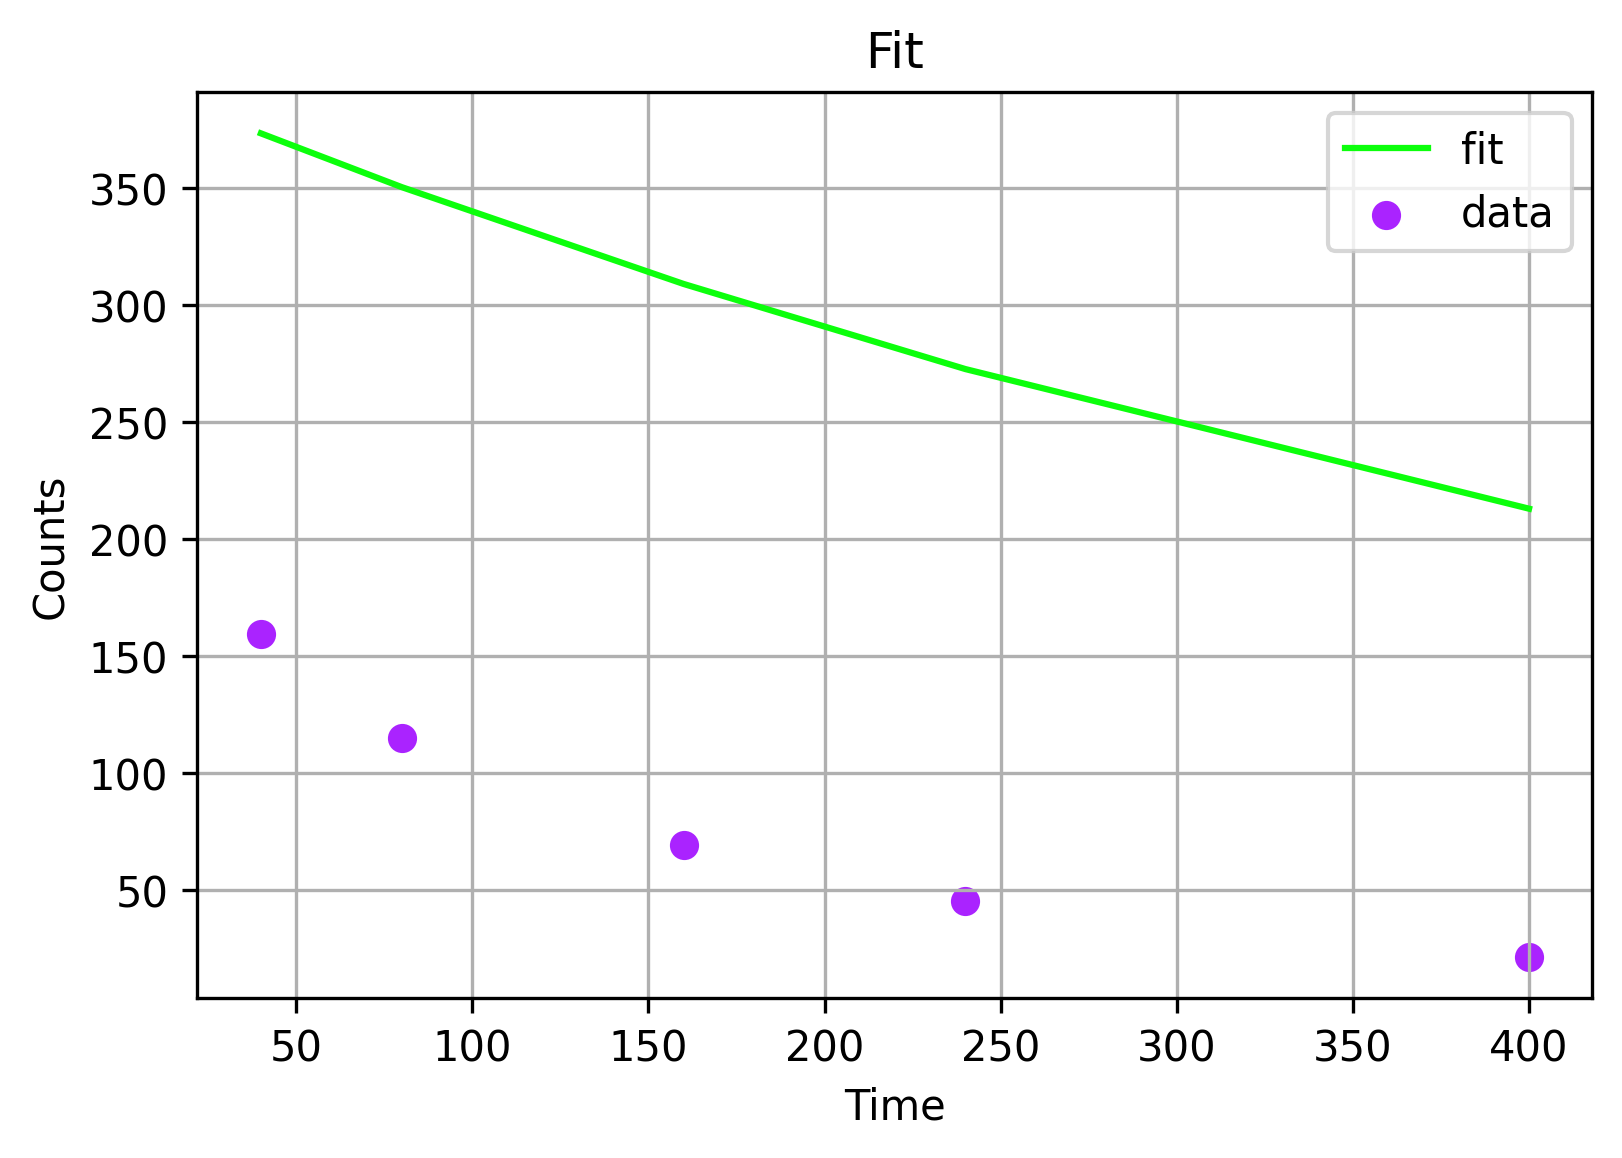

In [15]:
t2 = [40.0, 80.0, 160.0, 240.0, 400.0]
t2 = np.asarray(t2)
a = [159.6, 115.0, 69.3, 45.1, 21.3]
a = np.asarray(a)
a2 = [373.5, 350.5, 309.1, 272.7, 213.0]
a2 = np.asarray(a2)
a_err = [0.5, 0.5, 0.5, 0.5, 0.5]
y_err = np.asarray(a_err)

plot.figure(dpi = 300)
plot.scatter(t2, a, c = "xkcd:electric purple", label = "data")
plot.plot(t2, a2, c = "xkcd:neon green", label = "fit")
plot.legend()
plot.xlabel('Time')
plot.ylabel('Counts')
plot.title('Fit')
plot.grid()
plot.show()

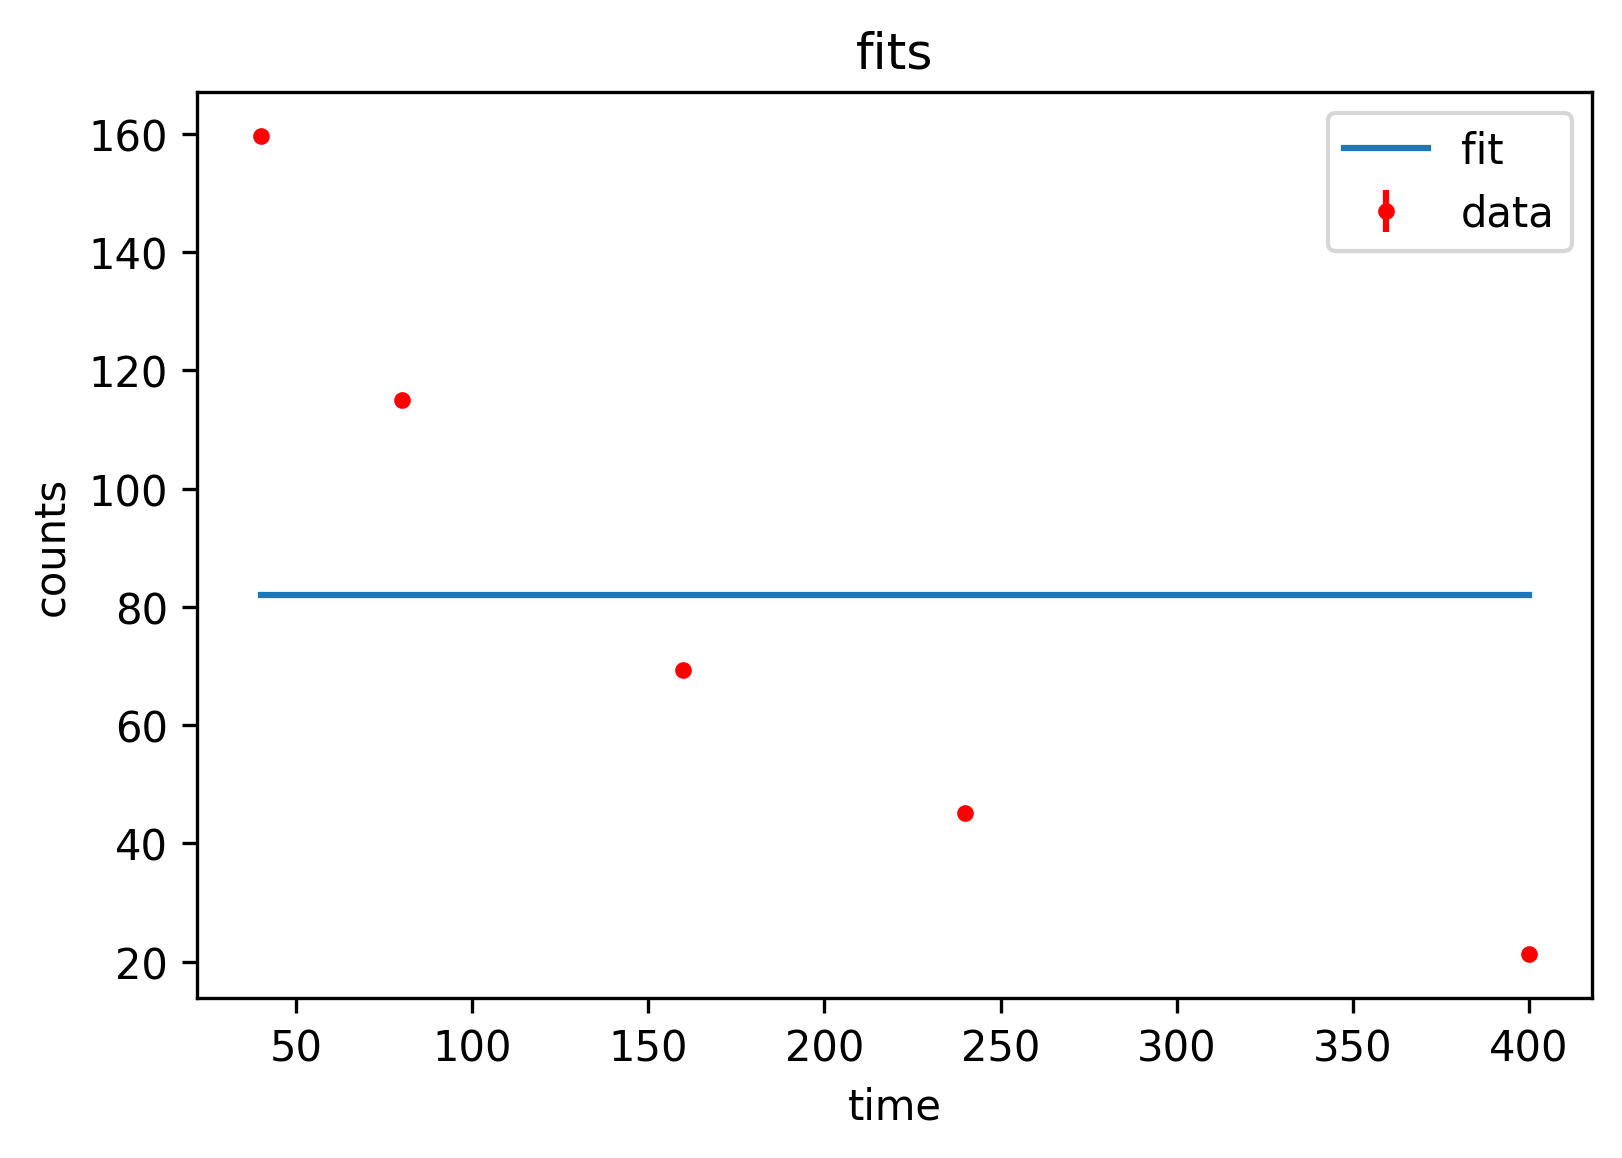

In [16]:
#Now to find the best fit

def straight_line(t2, t, b): 
    
    a = np.exp(-t2/t)+b
    return a


dof = len(t2) - 2 

#Make some initial guesses for a & b

t_InitialGuess=3
b_InitialGuess=1

popt, pcov = optimize.curve_fit(straight_line, t2, a, 
                                p0=[t_InitialGuess, b_InitialGuess], sigma=y_err, maxfev=8000) 

t = popt[0] 
b = popt[1]
errors = np.sqrt(np.diag(pcov))
t_err = errors[0] 
b_err = errors[1]

y_fit = straight_line(t2, t, b)

plot.figure(dpi=300)
plot.errorbar(t2, a, yerr=y_err, fmt='r.', label = "data")
plot.plot(t2, y_fit, marker=None, label = "fit") #draws a fitting line without discrete markers
plot.legend()
plot.ylabel('counts')
plot.xlabel('time')
plot.title('fits') 
plot.show()

In [17]:
#Time evolution of the Velocity Distribution
#v0 - v800 are all velocities at respective time values (0-800)
#RC is just the Relative Counts for each velocity term
v0 = [0.3, 1.1, 2.2, 3.7, 5.3, 7.1, 9.0, 10.9, 12.9, 14.9, 16.9, 18.9, 20.9, 22.9, 24.8, 26.8, 28.7, 30.6, 32.5, 34.3, 36.1, 37.4]
v0 = np.asarray(v0)
v100 = [0.3, 1.0, 2.1, 3.5, 5.1, 6.8, 8.5, 10.4, 12.3, 14.1, 16.0, 17.9, 19.8, 21.6, 23.5, 25.3, 27.0, 28.7, 30.4, 32.0, 33.5, 33.5]
v100 = np.asarray(v100)
v400 = [0.2, 0.9, 1.9, 3.1, 4.4, 5.9, 7.4, 9.0, 10.6, 12.2, 13.8, 15.3, 16.9, 18.4, 19.8, 21.2, 22.5, 23.8, 25.0, 26.0, 26.7, 24.2]
v400 = np.asarray(v400)
v800 = [0.2, 0.8, 1.6, 2.5, 3.7, 4.9, 6.1, 7.4, 8.7, 10.0, 11.2, 12.5, 13.6, 14.8, 15.8, 16.8, 17.7, 18.5, 19.2, 19.7, 19.7, 15.6]
v800 = np.asarray(v800)
v1200 = [0.2, 0.6, 1.3, 2.1, 3.0, 4.0, 5.1, 6.1, 7.1, 8.2, 9.2, 10.1, 11.0, 11.9 ,12.6, 13.3, 13.9, 14.4, 14.7, 14.9, 14.6, 10.1]
v1200 = np.asarray(v1200)

RC = [25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 275.0, 300.0, 325.0, 350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0, 525.0, 550.0]

Text(0.5, 1.0, 'Time Evolution of the Velocity Distribution')

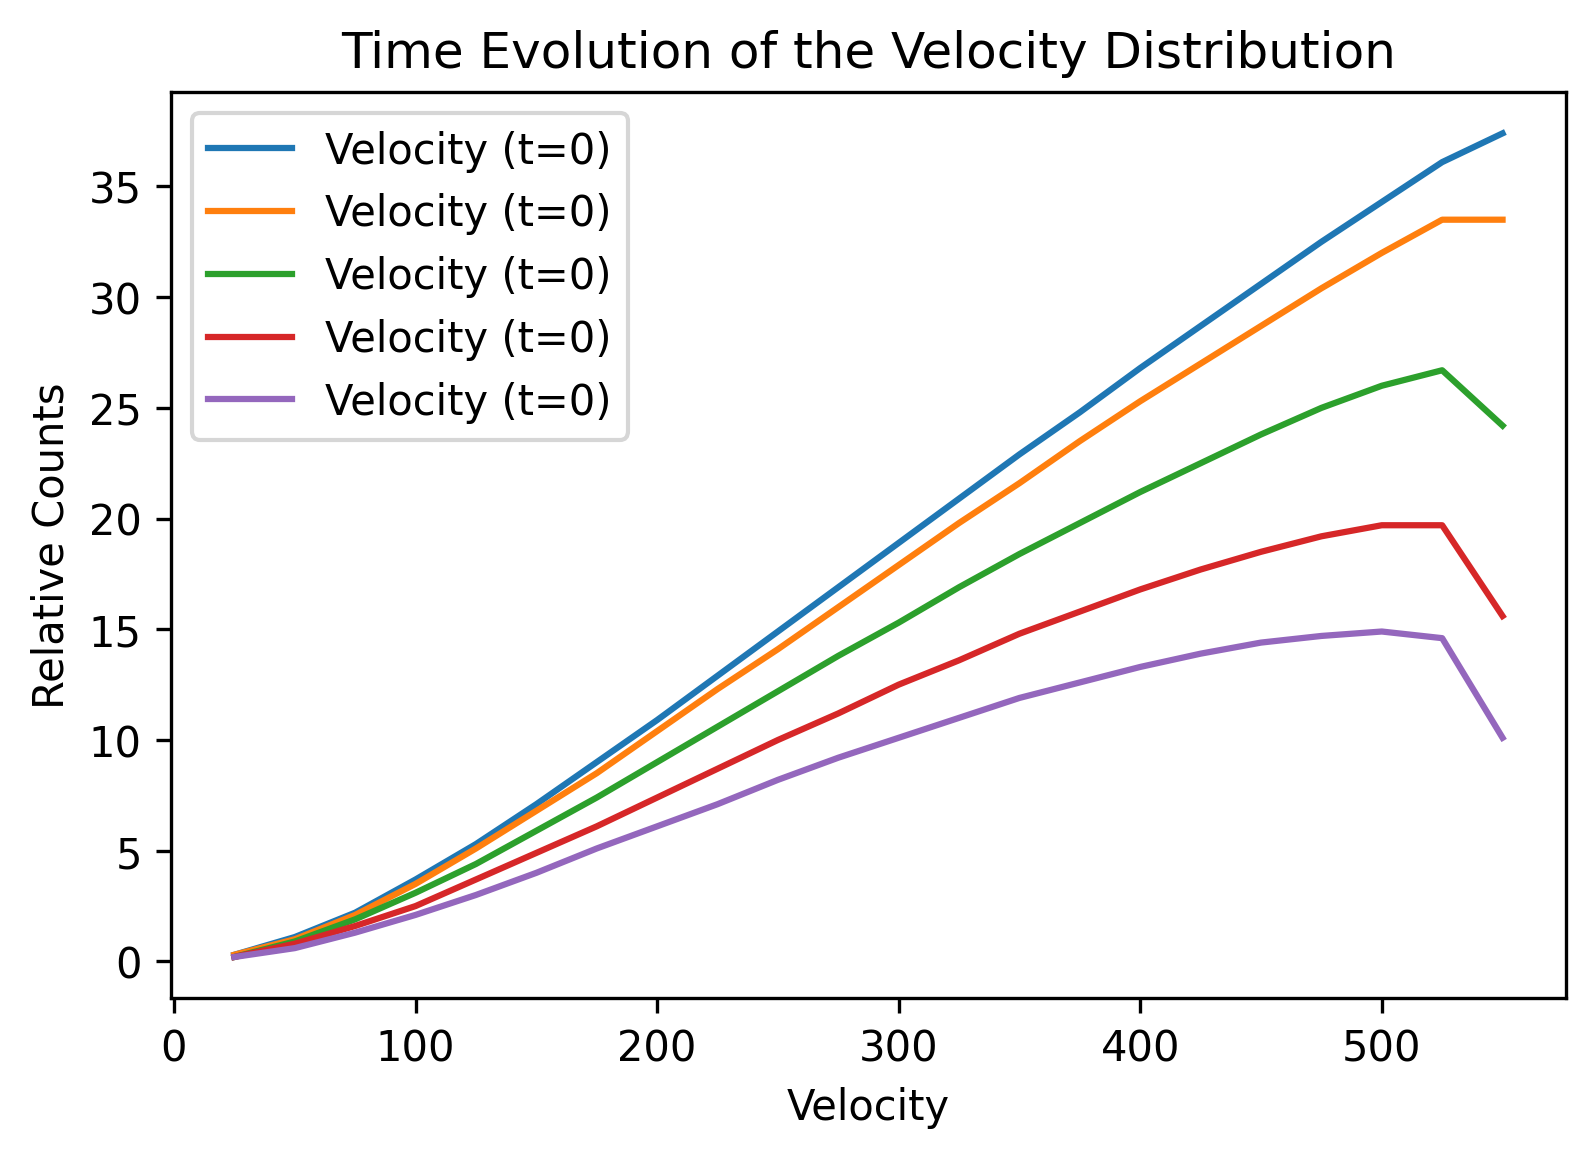

In [18]:
plot.figure(dpi=300)
plot.plot(RC, v0, marker=None, label = "Velocity (t=0)",)
plot.plot(RC, v100, marker=None, label = "Velocity (t=0)",)
plot.plot(RC, v400, marker=None, label = "Velocity (t=0)",)
plot.plot(RC, v800, marker=None, label = "Velocity (t=0)",)
plot.plot(RC, v1200, marker=None, label = "Velocity (t=0)",)
plot.legend()
plot.ylabel('Relative Counts')
plot.xlabel('Velocity')
plot.title('Time Evolution of the Velocity Distribution')